In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import sklearn.model_selection as ms

Using TensorFlow backend.


In [2]:
movie_data = pd.read_csv('../../data/processed/normalized-movie-data.csv')
trope_data = pd.read_csv('../../data/processed/trope-data.csv')

In [3]:
movie_data = movie_data.sort_values('id')
trope_data = trope_data.sort_values('id')

In [4]:
movie_data.head()

,revenue,class,id,budget,starpower,certification,year,Action,Adventure,Animation,...,Mystery,Romance,Science Fiction,Thriller,War,Western,rating,ratingClass,month1,month2
0,0.761342,8,tt0101272,0.151987,-0.309555,-2.307692e-01,-1.0,0,0,0,...,0,0,0,0,0,0,0.7,6,-0.500000,0.866025
1,0.642307,8,tt0101393,0.800524,0.211361,-6.153846e-01,-1.0,1,0,0,...,1,0,0,1,0,0,0.7,6,0.500000,-0.866025
2,-1.028794,2,tt0101410,-0.700167,0.306794,-6.153846e-01,-1.0,0,0,0,...,0,0,0,0,0,0,0.8,7,-0.866025,-0.500000
3,1.114533,9,tt0101414,0.022942,0.515804,2.220446e-16,-1.0,0,0,1,...,0,1,0,0,0,0,0.8,8,-0.500000,0.866025
4,0.134892,5,tt0101507,-0.930496,-0.137823,-6.153846e-01,-1.0,0,0,0,...,0,0,0,0,0,0,0.8,7,-0.500000,-0.866025


In [5]:
movie_data.columns

Index(['revenue', 'class', 'id', 'budget', 'starpower', 'certification',
       'year', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War',
       'Western', 'rating', 'ratingClass', 'month1', 'month2'],
      dtype='object')

In [6]:
movie_X = movie_data[['budget', 'starpower', 'certification',
       'year', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War',
       'Western', 'month1', 'month2']]
y = movie_data['ratingClass']

In [7]:
new_y = []
for index in range(len(y)):
    new_y.append([0] * 10)
    new_y[-1][y[index]] = 1
new_y = np.array(new_y).reshape(-1, 10)

In [8]:
trope_data.head()

,id,ABNegative,ABirthdayNotABreak,ABloodyMess,ABoyAGirlAndABabyFamily,ABoyAndHisX,ACappella,AChatWithSatan,AChildShallLeadThem,ACupAngst,...,ZombiePukeAttack,Zoom,ptitle27osktao4y3f,ptitle5f8le58t,ptitlei70v550i,ptitleke2fhm29,ptitlel9hiod7i,ptitlews9vjxau4x1j,ptitlex50era43,ptitlezt06x76c
1400,tt0101272,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
148,tt0101393,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164,tt0101410,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,tt0101414,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232,tt0101507,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
trope_X = trope_data.drop('id', axis=1)

## Neural Networks results using both trope and movie data

In [10]:
movie_input = keras.layers.Input((movie_X.shape[1],))
m = keras.layers.Dense(20, activation='relu')(movie_input)
movie_output = keras.layers.Dropout(0.4)(m)

In [11]:
trope_input = keras.layers.Input((trope_X.shape[1],))
t = keras.layers.Dense(512, activation='relu')(trope_input)
t = keras.layers.Dropout(0.4)(t)
t = keras.layers.Dense(256, activation='relu')(trope_input)
t = keras.layers.Dropout(0.4)(t)
t = keras.layers.Dense(1, activation='relu')(t)
trope_output = keras.layers.Dropout(0.4)(t)

In [12]:
model_input = keras.layers.concatenate([movie_input, trope_output])
l = keras.layers.Dense(20, activation='relu')(model_input)
l = keras.layers.Dropout(0.4)(l)
model_output = keras.layers.Dense(10, activation='softmax')(l)

model = keras.models.Model(inputs=[movie_input, trope_input], outputs=(model_output))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [13]:
history = model.fit(x=[movie_X, trope_X],
          y=new_y,
          validation_split=0.2,
          epochs=200,
          batch_size=128,
          verbose=2)

Train on 1575 samples, validate on 394 samples
Epoch 1/200
 - 2s - loss: 2.4727 - acc: 0.0692 - val_loss: 2.3274 - val_acc: 0.1066
Epoch 2/200
 - 1s - loss: 2.3236 - acc: 0.1168 - val_loss: 2.2250 - val_acc: 0.2005
Epoch 3/200
 - 1s - loss: 2.2095 - acc: 0.1930 - val_loss: 2.0559 - val_acc: 0.2970
Epoch 4/200
 - 1s - loss: 2.0701 - acc: 0.2533 - val_loss: 1.9357 - val_acc: 0.3680
Epoch 5/200
 - 1s - loss: 1.9646 - acc: 0.3060 - val_loss: 1.8318 - val_acc: 0.4036
Epoch 6/200
 - 1s - loss: 1.8116 - acc: 0.3695 - val_loss: 1.7243 - val_acc: 0.4162
Epoch 7/200
 - 1s - loss: 1.7416 - acc: 0.3898 - val_loss: 1.6517 - val_acc: 0.4239
Epoch 8/200
 - 1s - loss: 1.6353 - acc: 0.4159 - val_loss: 1.5866 - val_acc: 0.4416
Epoch 9/200
 - 1s - loss: 1.5921 - acc: 0.4286 - val_loss: 1.5173 - val_acc: 0.4518
Epoch 10/200
 - 1s - loss: 1.5201 - acc: 0.4514 - val_loss: 1.4711 - val_acc: 0.4442
Epoch 11/200
 - 1s - loss: 1.4590 - acc: 0.4629 - val_loss: 1.4656 - val_acc: 0.4518
Epoch 12/200
 - 1s - loss: 

Epoch 97/200
 - 1s - loss: 0.9526 - acc: 0.6444 - val_loss: 2.0138 - val_acc: 0.4645
Epoch 98/200
 - 1s - loss: 0.9771 - acc: 0.6305 - val_loss: 2.0465 - val_acc: 0.4594
Epoch 99/200
 - 1s - loss: 0.9456 - acc: 0.6362 - val_loss: 2.1148 - val_acc: 0.4492
Epoch 100/200
 - 1s - loss: 0.9606 - acc: 0.6298 - val_loss: 2.2718 - val_acc: 0.4340
Epoch 101/200
 - 1s - loss: 0.9673 - acc: 0.6222 - val_loss: 2.0636 - val_acc: 0.4416
Epoch 102/200
 - 1s - loss: 0.9583 - acc: 0.6368 - val_loss: 2.1687 - val_acc: 0.4492
Epoch 103/200
 - 1s - loss: 0.9608 - acc: 0.6279 - val_loss: 1.9293 - val_acc: 0.4315
Epoch 104/200
 - 1s - loss: 0.9759 - acc: 0.6292 - val_loss: 2.0356 - val_acc: 0.4569
Epoch 105/200
 - 1s - loss: 0.9819 - acc: 0.6178 - val_loss: 2.0201 - val_acc: 0.4518
Epoch 106/200
 - 1s - loss: 0.9801 - acc: 0.6273 - val_loss: 1.9502 - val_acc: 0.4340
Epoch 107/200
 - 1s - loss: 0.9540 - acc: 0.6248 - val_loss: 2.1218 - val_acc: 0.4442
Epoch 108/200
 - 1s - loss: 0.9924 - acc: 0.6089 - val_lo

Epoch 193/200
 - 1s - loss: 0.9133 - acc: 0.6476 - val_loss: 2.4725 - val_acc: 0.4365
Epoch 194/200
 - 1s - loss: 0.9333 - acc: 0.6337 - val_loss: 2.2956 - val_acc: 0.4112
Epoch 195/200
 - 1s - loss: 0.9284 - acc: 0.6425 - val_loss: 2.3559 - val_acc: 0.4264
Epoch 196/200
 - 1s - loss: 0.9158 - acc: 0.6483 - val_loss: 2.4182 - val_acc: 0.4289
Epoch 197/200
 - 1s - loss: 0.9195 - acc: 0.6546 - val_loss: 2.4374 - val_acc: 0.4289
Epoch 198/200
 - 1s - loss: 0.9274 - acc: 0.6381 - val_loss: 2.4822 - val_acc: 0.4365
Epoch 199/200
 - 1s - loss: 0.9045 - acc: 0.6502 - val_loss: 2.4494 - val_acc: 0.4264
Epoch 200/200
 - 1s - loss: 0.9059 - acc: 0.6546 - val_loss: 2.4944 - val_acc: 0.4340


In [14]:
best_acc = max(history.history['val_acc'])
best_epoch = history.history['val_acc'].index(best_acc)
print("Best Result: {}, epoch: {}".format(best_acc, best_epoch))

Best Result: 0.46954314735940267, epoch: 11


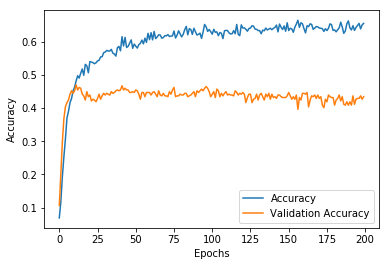

In [15]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

## Neural networks using only movie data

In [16]:
#model_input = keras.layers.concatenate([movie_input, trope_output])
l = keras.layers.Dense(20, activation='relu')(movie_input)
l = keras.layers.Dropout(0.4)(l)
model_output = keras.layers.Dense(10, activation='softmax')(l)

model = keras.models.Model(inputs=movie_input, outputs=model_output)
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc'])

In [17]:
history = model.fit(x=movie_X,
          y=new_y,
          validation_split=0.2,
          epochs=200,
          batch_size=128,
          verbose=2)

Train on 1575 samples, validate on 394 samples
Epoch 1/200
 - 0s - loss: 2.3156 - acc: 0.1086 - val_loss: 2.1579 - val_acc: 0.1853
Epoch 2/200
 - 0s - loss: 2.2008 - acc: 0.1714 - val_loss: 2.0532 - val_acc: 0.2944
Epoch 3/200
 - 0s - loss: 2.1025 - acc: 0.2298 - val_loss: 1.9656 - val_acc: 0.3553
Epoch 4/200
 - 0s - loss: 2.0318 - acc: 0.2844 - val_loss: 1.8867 - val_acc: 0.4086
Epoch 5/200
 - 0s - loss: 1.9604 - acc: 0.3054 - val_loss: 1.8134 - val_acc: 0.4061
Epoch 6/200
 - 0s - loss: 1.8939 - acc: 0.3549 - val_loss: 1.7451 - val_acc: 0.4137
Epoch 7/200
 - 0s - loss: 1.8310 - acc: 0.3594 - val_loss: 1.6838 - val_acc: 0.4112
Epoch 8/200
 - 0s - loss: 1.7777 - acc: 0.3644 - val_loss: 1.6301 - val_acc: 0.3985
Epoch 9/200
 - 0s - loss: 1.7371 - acc: 0.3829 - val_loss: 1.5831 - val_acc: 0.4061
Epoch 10/200
 - 0s - loss: 1.6917 - acc: 0.3924 - val_loss: 1.5399 - val_acc: 0.4086
Epoch 11/200
 - 0s - loss: 1.6659 - acc: 0.3702 - val_loss: 1.5043 - val_acc: 0.4086
Epoch 12/200
 - 0s - loss: 

Epoch 97/200
 - 0s - loss: 1.2369 - acc: 0.5086 - val_loss: 1.2129 - val_acc: 0.4924
Epoch 98/200
 - 0s - loss: 1.2471 - acc: 0.4844 - val_loss: 1.2131 - val_acc: 0.4924
Epoch 99/200
 - 0s - loss: 1.2455 - acc: 0.4800 - val_loss: 1.2121 - val_acc: 0.4924
Epoch 100/200
 - 0s - loss: 1.2423 - acc: 0.4825 - val_loss: 1.2126 - val_acc: 0.4924
Epoch 101/200
 - 0s - loss: 1.2452 - acc: 0.4857 - val_loss: 1.2126 - val_acc: 0.4924
Epoch 102/200
 - 0s - loss: 1.2467 - acc: 0.4883 - val_loss: 1.2130 - val_acc: 0.4898
Epoch 103/200
 - 0s - loss: 1.2335 - acc: 0.4876 - val_loss: 1.2127 - val_acc: 0.4949
Epoch 104/200
 - 0s - loss: 1.2319 - acc: 0.4978 - val_loss: 1.2143 - val_acc: 0.4924
Epoch 105/200
 - 0s - loss: 1.2359 - acc: 0.4984 - val_loss: 1.2150 - val_acc: 0.4924
Epoch 106/200
 - 0s - loss: 1.2326 - acc: 0.4762 - val_loss: 1.2149 - val_acc: 0.4949
Epoch 107/200
 - 0s - loss: 1.2498 - acc: 0.4870 - val_loss: 1.2157 - val_acc: 0.4949
Epoch 108/200
 - 0s - loss: 1.2379 - acc: 0.4895 - val_lo

Epoch 193/200
 - 0s - loss: 1.2133 - acc: 0.4889 - val_loss: 1.2196 - val_acc: 0.4873
Epoch 194/200
 - 0s - loss: 1.2033 - acc: 0.4959 - val_loss: 1.2203 - val_acc: 0.4822
Epoch 195/200
 - 0s - loss: 1.2005 - acc: 0.4965 - val_loss: 1.2206 - val_acc: 0.4848
Epoch 196/200
 - 0s - loss: 1.2081 - acc: 0.4959 - val_loss: 1.2192 - val_acc: 0.4822
Epoch 197/200
 - 0s - loss: 1.2095 - acc: 0.5003 - val_loss: 1.2208 - val_acc: 0.4848
Epoch 198/200
 - 0s - loss: 1.1953 - acc: 0.5010 - val_loss: 1.2202 - val_acc: 0.4873
Epoch 199/200
 - 0s - loss: 1.1917 - acc: 0.5105 - val_loss: 1.2198 - val_acc: 0.4873
Epoch 200/200
 - 0s - loss: 1.1999 - acc: 0.5225 - val_loss: 1.2193 - val_acc: 0.4924


In [18]:
best_acc = max(history.history['val_acc'])
best_epoch = history.history['val_acc'].index(best_acc)
print("Best Result: {}, epoch: {}".format(best_acc, best_epoch))

Best Result: 0.4949238584731436, epoch: 102


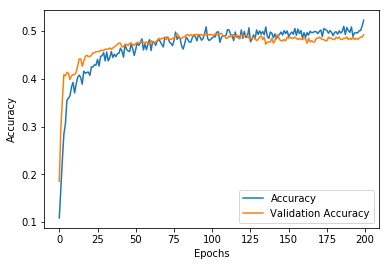

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()